In [1]:
using DataFrames, XLSX, DataFramesMeta
using LinearAlgebra,LightGraphs, SimpleWeightedGraphs, HDF5

### Convert R -> G, X -> B

#### AC Line

In [2]:
AC_Line  = DataFrame(XLSX.readtable("IrishSystem2018.xlsx", "AC-Line", infer_eltypes=true)... );

In [4]:
From_Line = AC_Line.From;
To_Line = AC_Line.To;
T1 = AC_Line.T;
ϕ1 = AC_Line.phi;
Rl = AC_Line.R;
Xl = AC_Line.X;
Bsh_2 = AC_Line.B;
Type1 = fill("Line",size(From_Line));

In [5]:
YL = (Rl + Xl*im).^-1 
Gl = real(YL);
Bl = imag(YL);

#### 2 Winding Transformers

In [6]:
W_2_Trafo  = DataFrame(XLSX.readtable("IrishSystem2018.xlsx", "2-Winding", infer_eltypes=true)... );

In [7]:
From_Trafo2 = W_2_Trafo.From;
To_Trafo2 = W_2_Trafo.To;
T2 = W_2_Trafo.T;
ϕ2 = W_2_Trafo.phi;
Gm2 = W_2_Trafo.G;
Bm2 = W_2_Trafo.B;
RT = W_2_Trafo.R;
XT = W_2_Trafo.X;
Type2 = fill("Trafo-2",size(From_Trafo2));

In [8]:
YT = (RT + XT*im).^-1 
GT = real(YT);
BT = imag(YT);

#### 3 Winding Transformers

In [9]:
W_3_Trafo  = DataFrame(XLSX.readtable("IrishSystem2018.xlsx", "3-Winding", infer_eltypes=true)... );

In [10]:
One_Trafo3 = W_3_Trafo.From;
Two_Trafo3 = W_3_Trafo.To;
Three_Trafo3 = W_3_Trafo.Last;
T3 = W_3_Trafo.T;
ϕ3 = W_3_Trafo.phi;
Gm3 = W_3_Trafo.G;
Bm3 = W_3_Trafo.B;
RT_12 = W_3_Trafo.W12_R;
XT_12 = W_3_Trafo.W12_X;
RT_23 = W_3_Trafo.W23_R;
XT_23 = W_3_Trafo.W23_X;
RT_31 = W_3_Trafo.W31_R;
XT_31 = W_3_Trafo.W31_X;
Type3 = fill("Trafo-3",size(One_Trafo3));

In [11]:
YT_12 = (RT_12 + XT_12*im).^-1 ;GT_12 = real(YT_12);BT_12 = imag(YT_12);
YT_23 = (RT_23 + XT_23*im).^-1 ;GT_23 = real(YT_23);BT_23 = imag(YT_23);
YT_31 = (RT_31 + XT_31*im).^-1 ;GT_31 = real(YT_31);BT_31 = imag(YT_31);

In [12]:
Branch_Tox = vcat(From_Line,From_Trafo2,One_Trafo3,Two_Trafo3,Three_Trafo3);
Branch_Fromx = vcat(To_Line, To_Trafo2, Two_Trafo3, Three_Trafo3, One_Trafo3);
Gx = vcat( Gl, GT, GT_12, GT_23, GT_31);
Bx = vcat( Bl, BT, BT_12, BT_23, BT_31);
Bshx = Float64.(vcat(Bsh_2, Bm2, Bm3, Bm3, Bm3));
Tx = Float64.(vcat( T1, T2, T3, T3, T3));
ϕx = Float64.(vcat( ϕ1, ϕ2, ϕ3, ϕ3, ϕ3));
Typex = vcat( Type1, Type2, Type3, Type3, Type3);

In [13]:
replace!(Gx, Inf => 0);
replace!(Bx, Inf =>0);
replace!(Bshx, Inf => 0);

In [14]:
Branch = DataFrame(From = Branch_Fromx, To = Branch_Tox, 
                G = Gx, B = Bx, Bsh = Bshx, T = Tx, ϕ = ϕx, Type = Typex)

,From,To,G,B,Bsh,T,ϕ,Type
,Int64,Int64,Float64,Float64,Float64,Float64,Float64,String
1,42404,11,127.266,-138.402,0.00207,1.0,0.0,Line
2,25404,12,58.2219,-86.6786,0.00407,1.0,0.0,Line
3,25404,12,53.8633,-78.528,0.00435,1.0,0.0,Line
4,46504,12,23.651,-23.4513,0.00329,1.0,0.0,Line
5,46504,12,29.1183,-25.6006,0.00256,1.0,0.0,Line
6,2121,1021,5.38915,-12.6249,0.0059,1.0,0.0,Line
7,2361,1021,1.74431,-8.98991,0.0117,1.0,0.0,Line
8,3541,1021,5.00208,-26.0672,0.0116,1.0,0.0,Line
9,10210,1021,0.0,-10000.0,0.0,1.0,0.0,Line


In [15]:
Bus  = DataFrame(XLSX.readtable("IrishSystem2018.xlsx", "Bus", infer_eltypes=true)... );

In [15]:
N=nrow(Bus);
G = SimpleWeightedGraph(N)
for i in 1:length(Branch.From)
    add_edge!(G, Branch.From[i], Branch.To[i], Branch.G[i])
end

┌ Warning: Note: adding edges with a zero weight to this graph type has no effect.
└ @ SimpleWeightedGraphs C:\Users\cilli\.julia\packages\SimpleWeightedGraphs\yUFrc\src\simpleweightedgraph.jl:103


In [17]:
Bus = Bus.Bus;

ErrorException: type Array has no field Bus

In [18]:
Gd = Dict{Tuple{Int64, Int64}, Float64}()   # Conductance Dictionary
Bd = Dict{Tuple{Int64, Int64}, Float64}()   # Susceptance Dictionary
Bshd = Dict{Tuple{Int64, Int64}, Float64}() # Shunt Susceptance Dictionary
Td = Dict{Tuple{Int64, Int64}, Float64}()   # Nominal 
ϕd = Dict{Tuple{Int64, Int64}, Float64}()
for i in 1:size(Branch)[1]
    Gd[(Branch.From[i],Branch.To[i])] = Branch.G[i]
    Bd[(Branch.From[i],Branch.To[i])] = Branch.B[i]
    Bshd[(Branch.From[i],Branch.To[i])] = Branch.Bsh[i]
    Td[(Branch.From[i],Branch.To[i])] = Branch.T[i]
    ϕd[(Branch.From[i],Branch.To[i])] = Branch.ϕ[i]
end

In [19]:
Gdc = deepcopy(Gd);

In [20]:
for i in Bus 
x1 = filter(((k1,k2),v) -> k1 == i || k2 == i,Gdc)
x2 = sum(values(x1))
Gdc[i,i] = x2
end

┌ Warning: In `filter(f, dict)`, `f` is now passed a single pair instead of two arguments.
│   caller = top-level scope at In[20]:2
└ @ Core In[20]:2


In [20]:
filter(((k1,k2),v) -> k1 == 90012 || k2 == 90012,Gdc)

┌ Warning: In `filter(f, dict)`, `f` is now passed a single pair instead of two arguments.
│   caller = top-level scope at In[20]:1
└ @ Core In[20]:1


Dict{Tuple{Int64,Int64},Float64} with 8 entries:
  (90020, 90012) => 0.342703
  (90012, 90063) => 0.0
  (90012, 90011) => 0.0
  (90012, 86511) => 4.19589
  (90012, 90012) => 20.8631
  (90012, 71512) => 6.75267
  (90012, 71511) => 5.3759
  (90012, 86512) => 4.19589

In [36]:
TestData = DataFrame(From = [ 1, 1, 2, 3, 3, 4], To = [ 2, 3, 4, 4, 5, 5], 
    R = [ 0.0, 0.023, 0.006, 0.020, 0.0, 0.0], X = [ 0.3, 0.145, 0.032, 0.260, 0.320, 0.500], 
    Bsh = [ 0.0, 0.040, 0.010, 0.0, 0.0, 0.0], T = [ 1.0, 1.0, 1.0, 1.0, 0.98,1], 
    ϕ = [ 0.0, 0.0, 0.0, -3.0, 0.0, 0.0]);


In [39]:
Zsh = [ 0.0+0.0*im 0.0+0.3*im 0.05+0.0*im 0.0+0.0*im 0.0+0.0*im] 

1×5 Array{Complex{Float64},2}:
 0.0+0.0im  0.0+0.3im  0.05+0.0im  0.0+0.0im  0.0+0.0im

In [40]:
R = TestData.R; X = TestData.X; Bsh = TestData.Bsh; T = TestData.T; ϕ = TestData.ϕ;
Y = (R + X*im).^-1; G = real(Y); B = imag(Y);
insertcols!(TestData, 3, Y = Y)

,From,To,Y,R,X,Bsh,T,ϕ
,Int64,Int64,Complex…,Float64,Float64,Float64,Float64,Float64
1,1,2,0.0-3.33333im,0.0,0.3,0.0,1.0,0.0
2,1,3,1.06709-6.72729im,0.023,0.145,0.04,1.0,0.0
3,2,4,5.66038-30.1887im,0.006,0.032,0.01,1.0,0.0
4,3,4,0.294118-3.82353im,0.02,0.26,0.0,1.0,-3.0
5,3,5,0.0-3.125im,0.0,0.32,0.0,0.98,0.0
6,4,5,0.0-2.0im,0.0,0.5,0.0,1.0,0.0


In [41]:
TestData.Y

6-element Array{Complex{Float64},1}:
                 0.0 - 3.3333333333333335im
   1.067087315579475 - 6.727289598218428im 
   5.660377358490566 - 30.188679245283016im
 0.29411764705882354 - 3.8235294117647056im
                 0.0 - 3.125im             
                 0.0 - 2.0im               

In [9]:
Yd = Dict{Tuple{Int64, Int64}, Complex{Float64}}()   # Admittance Matrix
Bshd = Dict{Tuple{Int64, Int64}, Float64}() # Shunt Susceptance Dictionary
Td = Dict{Tuple{Int64, Int64}, Float64}()   # Nominal Transformer
ϕd = Dict{Tuple{Int64, Int64}, Float64}()   # Transformer Phase Shift
for i in 1:size(TestData)[1]
    println(i)
    Yd[(TestData.From[i], TestData.To[i])] = TestData.Y[i]
    Bshd[(TestData.From[i], TestData.To[i])] = TestData.Bsh[i]
    Td[(TestData.From[i], TestData.To[i])] = TestData.T[i]
    ϕd[(TestData.From[i], TestData.To[i])] = TestData.ϕ[i]
end

1
2
3
4
5
6


In [32]:
unique(append!(TestData.From,TestData.To))

5-element Array{Int64,1}:
 1
 2
 3
 4
 5

## Constructing Off Diagnol Elements

In [3]:
Y_Test =  Dict{Tuple{Int64, Int64}, Complex{Float64}}()

for i in unique(append!(TestData.From,TestData.To))
Y_N = filter(((k1,k2),v) -> k1 == i || k2 == i,Yd);
T_N = filter(((k1,k2),v) -> k1 == i || k2 == i,Td);
ϕ_N = filter(((k1,k2),v) -> k1 == i || k2 == i,ϕd);


#a_N = [T_N[i,j]*exp( deg2rad(ϕ_N[i,j])*im)  for (i,j) in keys(Y_N)]
#println(a_N)

Y_Test[i,i] =  sum(
        append!([norm( 1/T_N[i,j]*exp( deg2rad(ϕ_N[i,j])*im), 2 ) * ( (Bshd[i,j]*im)/2 + Y_N[i,j]) for (i,j) in keys(Y_N)], Zsh[i])
    )


end
    
    


UndefVarError: UndefVarError: TestData not defined

In [45]:
Y_Test

Dict{Tuple{Int64,Int64},Complex{Float64}} with 5 entries:
  (3, 3) => 1.4112-13.7196im
  (2, 2) => 5.66038-33.217im
  (1, 1) => 1.06709-10.0406im
  (4, 4) => 5.9545-36.0072im
  (5, 5) => 0.0-5.18878im

In [59]:
(0.294 - 3.824*im)/((0.999 - 0.052*im)*(0.999 + 0.052*im))

0.2937928760224042 - 3.8213059792846042im

#### Machine

In [4]:
Machine  = DataFrame(XLSX.readtable("IrishSystem2018.xlsx", "Machine", infer_eltypes=true)... );
Owner = DataFrame(XLSX.readtable("IrishSystem2018.xlsx", "Owner", infer_eltypes=true)... );

In [5]:
New = deepcopy(Machine.Owner_1)
for n in 1:length(Owner.Owner_Num)
    New = replace(New, Owner.Owner_Num[n] => Owner.Owner_Name[n])
end
Machine.Owner_1 = New;

In [6]:
WIND = filter(s->occursin(r"WIND",s),Owner.Owner_Name);
Machine_Wind = Machine[findall( in(WIND), Machine.Owner_1),:];
sum(Machine_Wind.Pmax_MW)

5052.923000000002

In [18]:
show(Machine_Wind, allcols = true)

350×47 DataFrame
│ Row │ Bus   │ Bus_Name           │ Id  │ Term Node Num   │ Term Node Name   │
│     │ Int64 │ String             │ Any │ Any             │ Any              │
├─────┼───────┼────────────────────┼─────┼─────────────────┼──────────────────┤
│ 1   │ 67058 │ SEECON_PH1  0.6900 │ 1   │ missing         │ missing          │
│ 2   │ 33971 │ KNOCKACU    0.6600 │ TW  │ missing         │ missing          │
│ 3   │ 68272 │ CORDAL_PH2  38.000 │ 1   │ missing         │ missing          │
│ 4   │ 67066 │ MOUNTLUC_PH10.6900 │ 1   │ missing         │ missing          │
│ 5   │ 40971 │ MULREAVY    0.6900 │ 1   │ missing         │ missing          │
│ 6   │ 68092 │ UGOOL_PH1   0.6900 │ 1   │ missing         │ missing          │
│ 7   │ 22371 │ DERRYBRIEN  0.6900 │ 1   │ missing         │ missing          │
│ 8   │ 67094 │ SLIABH_BAWN 20.000 │ 1   │ missing         │ missing          │
│ 9   │ 15574 │ BOGGERAG    1.0000 │ 1   │ missing         │ missing          │
│ 10  │ 44871 │ DOORAY 

│ 1   │ 1          │ 0       │ 1          │ 0       │ 1          │ 0       │
│ 2   │ 1          │ 0       │ 1          │ 0       │ 1          │ 0       │
│ 3   │ 1          │ 0       │ 1          │ 0       │ 1          │ 0       │
│ 4   │ 1          │ 0       │ 1          │ 0       │ 1          │ 0       │
│ 5   │ 1          │ 0       │ 1          │ 0       │ 1          │ 0       │
│ 6   │ 1          │ 0       │ 1          │ 0       │ 1          │ 0       │
│ 7   │ 1          │ 0       │ 1          │ 0       │ 1          │ 0       │
│ 8   │ 1          │ 0       │ 1          │ 0       │ 1          │ 0       │
│ 9   │ 1          │ 0       │ 1          │ 0       │ 1          │ 0       │
│ 10  │ 1          │ 0       │ 1          │ 0       │ 1          │ 0       │
⋮
│ 340 │ 1          │ 0       │ 1          │ 0       │ 1          │ 0       │
│ 341 │ 1          │ 0       │ 1          │ 0       │ 1          │ 0       │
│ 342 │ 1          │ 0       │ 1          │ 0       │ 1          │ 0      

│ 347 │ missing     │ P.U. (Per Unit)   │ missing     │ missing     │
│ 348 │ missing     │ P.U. (Per Unit)   │ missing     │ missing     │
│ 349 │ missing     │ P.U. (Per Unit)   │ missing     │ missing     │
│ 350 │ missing     │ P.U. (Per Unit)   │ missing     │ missing     │

│ Row │ Reference Angle (deg) │ Machine Control Mode │
│     │ Any                   │ String               │
├─────┼───────────────────────┼──────────────────────┤
│ 1   │ missing               │ Conventional Machine │
│ 2   │ missing               │ Conventional Machine │
│ 3   │ missing               │ Conventional Machine │
│ 4   │ missing               │ Conventional Machine │
│ 5   │ missing               │ Conventional Machine │
│ 6   │ missing               │ Conventional Machine │
│ 7   │ missing               │ Conventional Machine │
│ 8   │ missing               │ Conventional Machine │
│ 9   │ missing               │ Conventional Machine │
│ 10  │ missing               │ Conventional Machine │
⋮
│ 

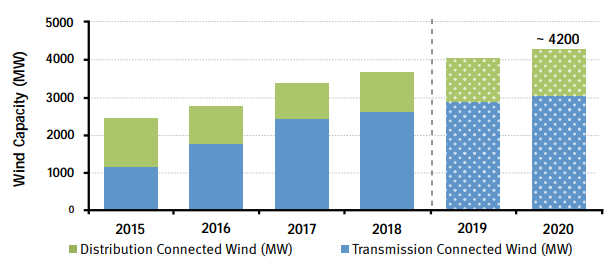

In [5]:
Wind_IE = filter(s->occursin(r"IE",s),Owner.Owner_Name);
Machine_Wind_IE = Machine_Wind[findall( in(Wind_IE), Machine_Wind.Owner_1),:];
sum(Machine_Wind_IE.Pmax_MW)

3919.9430000000025

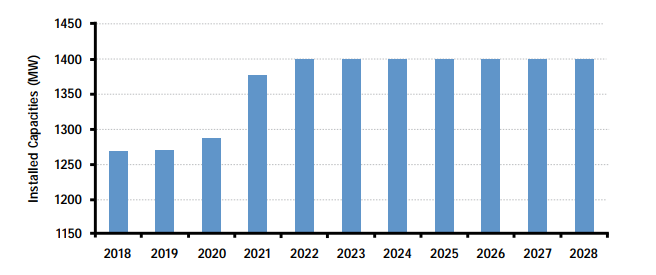

In [6]:
Wind_NI = filter(s->occursin(r"NI",s),Owner.Owner_Name);
Machine_Wind_NI = Machine_Wind[findall( in(Wind_NI), Machine_Wind.Owner_1),:];
sum(Machine_Wind_NI.Pmax_MW)

1132.9799999999996

There is 100MW's of missing wind in the PSSE file?

In [7]:
NonWIND = deepcopy(Owner.Owner_Name)
filter!(e->e∉WIND,NonWIND);

In [8]:
show(NonWIND)

["IE_URBAN", "IE_COMMUTING", "IE_RURAL", "Unknown-4", "Unknown-5", "IE_IND", "IE_DATA", "IE_COAL", "IE_GAS", "IE_OIL", "IE_DISTIL", "IE_PEAT", "IE_HYDRO", "IE_STORE", "IE_BIO_CHP", "IE_OFFSH", "IE_PV", "IE_REACT_COM", "IE_OCEAN", "NI_URBAN", "NI_COMMUTING", "NI_RURAL", "NI_GAS", "NI_OIL", "NI_BIO_CHP", "NI_PV", "NI_REACT_COM", "INTER", "Unknown-77"]

In [9]:
PV = filter(s->occursin(r"PV" ,s),Owner.Owner_Name);
HYDRO = filter(s->occursin(r"HYDRO" ,s),Owner.Owner_Name);
REACT_COM = filter(s->occursin(r"REACT_COM" ,s),Owner.Owner_Name);
BIO_CHP = filter(s->occursin(r"BIO_CHP" ,s),Owner.Owner_Name);
OCEAN = filter(s->occursin(r"OCEAN" ,s),Owner.Owner_Name);
STORE = filter(s->occursin(r"STORE" ,s),Owner.Owner_Name);
INTER = filter(s->occursin(r"INTER" ,s),Owner.Owner_Name);
RENEW = vcat(PV,HYDRO,BIO_CHP,OCEAN);
Non_Fossil = vcat(WIND,RENEW,STORE,INTER,REACT_COM);

In [10]:
Fossil = deepcopy(Owner.Owner_Name)
filter!(e->e∉Non_Fossil, Fossil)

19-element Array{String,1}:
 "IE_URBAN"    
 "IE_COMMUTING"
 "IE_RURAL"    
 "Unknown-4"   
 "Unknown-5"   
 "IE_IND"      
 "IE_DATA"     
 "IE_COAL"     
 "IE_GAS"      
 "IE_OIL"      
 "IE_DISTIL"   
 "IE_PEAT"     
 "IE_OFFSH"    
 "NI_URBAN"    
 "NI_COMMUTING"
 "NI_RURAL"    
 "NI_GAS"      
 "NI_OIL"      
 "Unknown-77"  

In [11]:
Machine_Fossil = deepcopy(Machine.Owner_1)
filter!(e->e ∈ Fossil, Machine_Fossil)

57-element Array{Any,1}:
 "IE_GAS"   
 "IE_GAS"   
 "IE_GAS"   
 "IE_GAS"   
 "IE_GAS"   
 "IE_COAL"  
 "IE_COAL"  
 "IE_COAL"  
 "IE_GAS"   
 "IE_GAS"   
 "NI_GAS"   
 "IE_OIL"   
 "IE_OIL"   
 ⋮          
 "IE_DISTIL"
 "IE_DISTIL"
 "NI_OIL"   
 "NI_OIL"   
 "NI_OIL"   
 "NI_OIL"   
 "IE_GAS"   
 "IE_GAS"   
 "IE_GAS"   
 "IE_RURAL" 
 "IE_GAS"   
 "IE_GAS"   

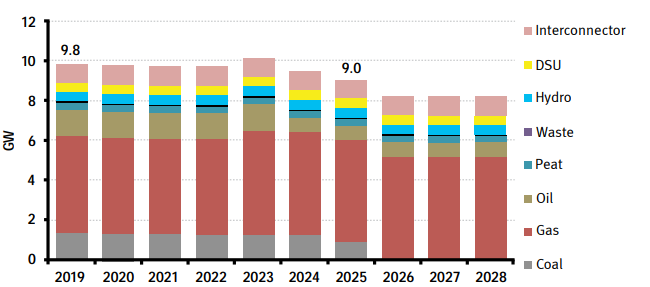

In [12]:
Machine_Fossil = Machine[findall( in(Fossil), Machine.Owner_1),:]
sum(Machine_Fossil.Pmax_MW)

8191.471000000002

In [16]:
Fossil_Gen = Machine_Fossil[!, [:Bus, :Bus_Name, :Pgen_MW, :Pmax_MW, :Pmin_MW, :Qgen_Mvar, :Qmax_Mvar, :Qmin_Mvar,:Owner_1]]
show(Fossil_Gen, allcols = true)

57×9 DataFrame
│ Row │ Bus   │ Bus_Name           │ Pgen_MW │ Pmax_MW │ Pmin_MW │ Qgen_Mvar │
│     │ Int64 │ String             │ Any     │ Any     │ Any     │ Any       │
├─────┼───────┼────────────────────┼─────────┼─────────┼─────────┼───────────┤
│ 1   │ 27474 │ ENDESA      21.000 │ 403     │ 462.5   │ 235     │ 94.233    │
│ 2   │ 28571 │ WHITEGATE   19.000 │ 396     │ 445.393 │ 110.1   │ 4.149     │
│ 3   │ 10470 │ AGH_CCGT    21.000 │ 0       │ 431.051 │ 222     │ -1.53     │
│ 4   │ 31271 │ DUBLIN_BAY_P21.000 │ 394     │ 403.9   │ 163     │ 295       │
│ 5   │ 29673 │ HUNTSTOWN   20.000 │ 400     │ 400     │ 194     │ 86.458    │
│ 6   │ 39472 │ MNYPG2-P    17.000 │ 220     │ 290.249 │ 60      │ 109.348   │
│ 7   │ 39471 │ MNYPG1      17.000 │ 217     │ 287     │ 60      │ -0.014    │
│ 8   │ 39473 │ MNYPG3      17.000 │ 220     │ 287     │ 60      │ -0.014    │
│ 9   │ 51771 │ TYNAGH      15.750 │ 0       │ 262     │ 155     │ 26.933    │
│ 10  │ 10471 │ AGH_G1      20.000 │ 

In [9]:
Machine_Wind[!,[:Bus, :Bus_Name, :Pmax_MW, :Pmin_MW, :Qgen_Mvar, :Qmax_Mvar, :Qmin_Mvar, 
        :Area_Num, :Area_Name ,:Zone_Num, :Zone_Name]];

In [10]:
show(Machine_Wind, allcols = true)

350×47 DataFrame
│ Row │ Bus   │ Bus_Name           │ Id  │ Term Node Num   │ Term Node Name   │
│     │ Int64 │ String             │ Any │ Any             │ Any              │
├─────┼───────┼────────────────────┼─────┼─────────────────┼──────────────────┤
│ 1   │ 67058 │ SEECON_PH1  0.6900 │ 1   │ missing         │ missing          │
│ 2   │ 33971 │ KNOCKACU    0.6600 │ TW  │ missing         │ missing          │
│ 3   │ 68272 │ CORDAL_PH2  38.000 │ 1   │ missing         │ missing          │
│ 4   │ 67066 │ MOUNTLUC_PH10.6900 │ 1   │ missing         │ missing          │
│ 5   │ 40971 │ MULREAVY    0.6900 │ 1   │ missing         │ missing          │
│ 6   │ 68092 │ UGOOL_PH1   0.6900 │ 1   │ missing         │ missing          │
│ 7   │ 22371 │ DERRYBRIEN  0.6900 │ 1   │ missing         │ missing          │
│ 8   │ 67094 │ SLIABH_BAWN 20.000 │ 1   │ missing         │ missing          │
│ 9   │ 15574 │ BOGGERAG    1.0000 │ 1   │ missing         │ missing          │
│ 10  │ 44871 │ DOORAY 

│ 9   │ 1          │ 0       │ 1          │ 0       │ 1          │ 0       │
│ 10  │ 1          │ 0       │ 1          │ 0       │ 1          │ 0       │
⋮
│ 340 │ 1          │ 0       │ 1          │ 0       │ 1          │ 0       │
│ 341 │ 1          │ 0       │ 1          │ 0       │ 1          │ 0       │
│ 342 │ 1          │ 0       │ 1          │ 0       │ 1          │ 0       │
│ 343 │ 1          │ 0       │ 1          │ 0       │ 1          │ 0       │
│ 344 │ 1          │ 0       │ 1          │ 0       │ 1          │ 0       │
│ 345 │ 1          │ 0       │ 1          │ 0       │ 1          │ 0       │
│ 346 │ 1          │ 0       │ 1          │ 0       │ 1          │ 0       │
│ 347 │ 1          │ 0       │ 1          │ 0       │ 1          │ 0       │
│ 348 │ 1          │ 0       │ 1          │ 0       │ 1          │ 0       │
│ 349 │ 1          │ 0       │ 1          │ 0       │ 1          │ 0       │
│ 350 │ 1          │ 0       │ 1          │ 0       │ 1          │ 0      

├─────┼───────────────────────┼──────────────────────┤
│ 1   │ missing               │ Conventional Machine │
│ 2   │ missing               │ Conventional Machine │
│ 3   │ missing               │ Conventional Machine │
│ 4   │ missing               │ Conventional Machine │
│ 5   │ missing               │ Conventional Machine │
│ 6   │ missing               │ Conventional Machine │
│ 7   │ missing               │ Conventional Machine │
│ 8   │ missing               │ Conventional Machine │
│ 9   │ missing               │ Conventional Machine │
│ 10  │ missing               │ Conventional Machine │
⋮
│ 340 │ missing               │ Conventional Machine │
│ 341 │ missing               │ Conventional Machine │
│ 342 │ missing               │ Conventional Machine │
│ 343 │ missing               │ Conventional Machine │
│ 344 │ missing               │ Conventional Machine │
│ 345 │ missing               │ Conventional Machine │
│ 346 │ missing               │ Conventional Machine │
│ 347 │ 

In [12]:
unique(Machine_Wind.Area_Name)

10-element Array{String,1}:
 "NW"        
 "LIMERICK"  
 "CORK KERRY"
 "KILDARE"   
 "CLARE"     
 "CAHIR NETW"
 "NE"        
 "N IRELAND" 
 "SE"        
 "DUBLIN 110"

In [13]:
using Distributions

┌ Info: Precompiling Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1273


In [18]:
Limrick_Data = DataFrame(XLSX.readtable("Wind_Data/Limrick.xlsx", "Data", infer_eltypes=true)... );
Limrick_Wind = Limrick_Data[!,:Wind_Speed];
#Limrick_Par = fit(Weibull, Limrick_Wind)


In [19]:
Limrick_Par = fit(Weibull, Limrick_Wind)

ErrorException: suffstats is not implemented for (Weibull, Array{Any,1}).

In [23]:
x = [3, 4,5]
ones(x)

MethodError: MethodError: no method matching ones(::Array{Int64,1})
Closest candidates are:
  ones(!Matched::Union{Integer, AbstractUnitRange}...) at array.jl:456
  ones(!Matched::Type{T}, !Matched::Union{Integer, AbstractUnitRange}...) where T at array.jl:457
  ones(!Matched::Tuple{Vararg{Union{Integer, AbstractUnitRange},N} where N}) at array.jl:458
  ...